In [11]:
# imports
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# path to data
round_3_data_path = Path(r"/home/zr/code/trading_project/exploratory_analysis/Prosperity2Data/round-3-island-data-bottle")

In [7]:
# get price data for previous days

days = [0, 1] # not getting data for day 0 because that can be used as a holdout

trades = {}
for day in days:
    
    trades[day]= pd.read_csv(round_3_data_path / Path(f"trades_round_3_day_{day}_nn.csv"), sep=";")


trading_data = pd.concat(trades[day] for day in days).reset_index()
trading_data

,index,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,0,NaN,NaN,CHOCOLATE,SEASHELLS,8001.0,8
1,1,0,NaN,NaN,ROSES,SEASHELLS,15001.0,3
2,2,200,NaN,NaN,ROSES,SEASHELLS,15000.0,3
3,3,500,NaN,NaN,STRAWBERRIES,SEASHELLS,3999.0,10
4,4,1000,NaN,NaN,GIFT_BASKET,SEASHELLS,71360.0,2
...,...,...,...,...,...,...,...,...
7551,3696,998900,NaN,NaN,ROSES,SEASHELLS,14419.0,4
7552,3697,999100,NaN,NaN,CHOCOLATE,SEASHELLS,7880.0,5
7553,3698,999300,NaN,NaN,ROSES,SEASHELLS,14424.0,1
7554,3699,999500,NaN,NaN,STRAWBERRIES,SEASHELLS,4036.0,4


In [9]:
products = trading_data["symbol"].unique()

product_data = {}
for product in products:
    product_data[product] = trading_data[trading_data["symbol"] == product]

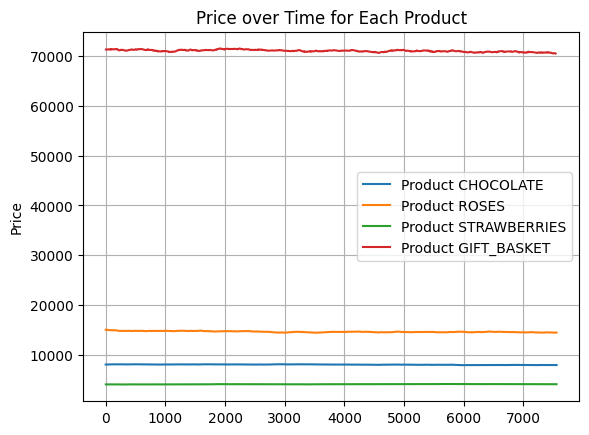

In [14]:
for product in products:
    plt.plot(product_data[product]['price'], label=f'Product {product}')

plt.ylabel('Price')
plt.title('Price over Time for Each Product')
plt.legend()
plt.grid(True)  # Optionally add a grid
plt.show()

In [18]:
def gift_basket_price(chocolate, roses, strawberries):
    return 4 * chocolate + roses + 6 * strawberries

In [33]:
# compare prices of constituents to gift baskets

chocolate = product_data["CHOCOLATE"]["price"]
roses = product_data["ROSES"]["price"]
strawberries = product_data["STRAWBERRIES"]["price"]
price_of_constituents_combined = gift_basket_price(chocolate, roses, strawberries)


3       3999.0
9       4001.0
11      4002.0
12      4001.0
14      4000.0
         ...  
7542    4037.0
7543    4038.0
7546    4038.0
7550    4036.0
7554    4036.0
Name: price, Length: 2439, dtype: float64

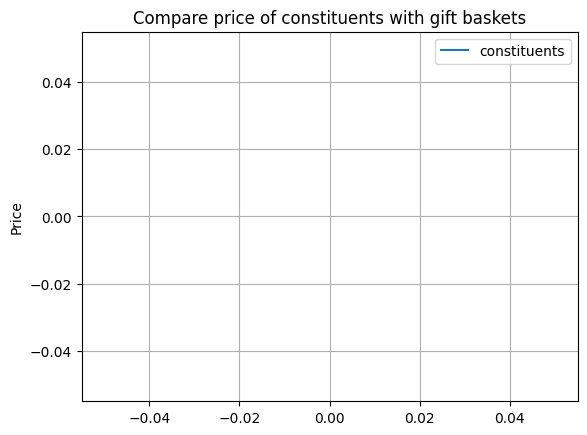

In [23]:
plt.plot(price_of_constituents_combined, label="constituents")
# plt.plot(product_data["GIFT_BASKET"]["price"], label="gift baskets")

plt.ylabel('Price')
plt.title('Compare price of constituents with gift baskets')
plt.legend()
plt.grid(True)  # Optionally add a grid
plt.show()